In [1]:
import torch
import pennylane as qml
from time import time
from tqdm import tqdm
import numpy as np
import matplotlib as plt

In [2]:
NUM_QUBITS = 8
NUM_LAYERS = 3

# get the device
dev = qml.device("default.qubit", wires=NUM_QUBITS)

In [8]:
def prova2(params, n_qubits = NUM_QUBITS):
    for j in range(n_qubits):
        qml.RX(params[j, 0], wires=j)
        qml.RY(params[j, 1], wires=j)
        qml.RZ(params[j, 2], wires=j)
    for j in range(n_qubits):
          qml.CNOT(wires=[j, (j + 1) % n_qubits])
    return qml.state()

In [5]:
qnode = qml.QNode(prova, dev)

In [7]:
qnode

<QNode: device='<default.qubit device (wires=8) at 0x7fb96c4050a0>', interface='auto', diff_method='best'>

In [9]:
from torch.autograd import Variable
parameters = Variable(torch.normal( mean=0. , std=0.1, size=(NUM_QUBITS, 3)), requires_grad=True)

(<Figure size 1400x900 with 1 Axes>, <Axes: >)

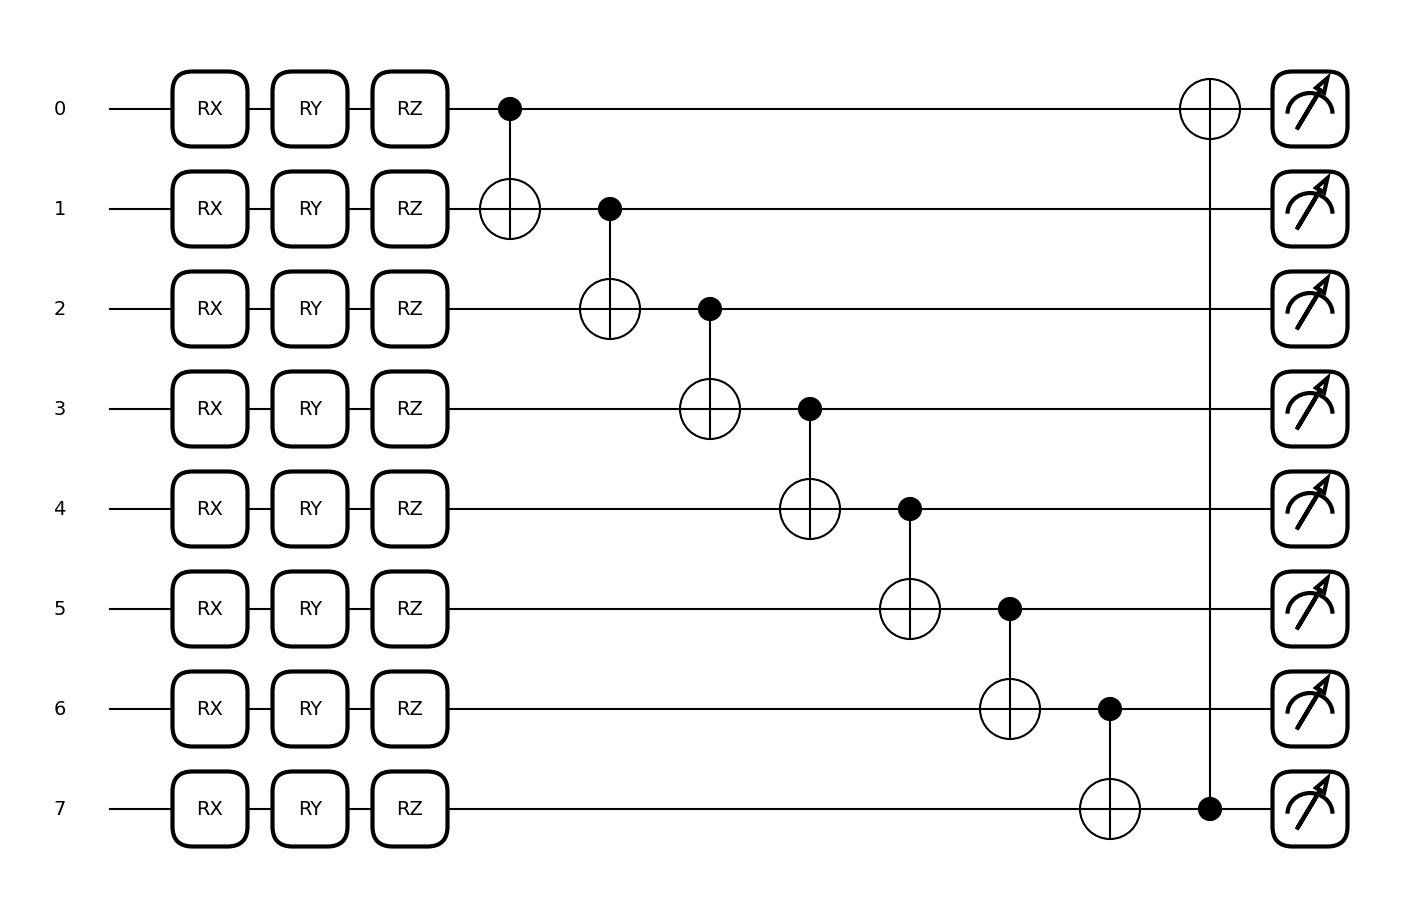

In [11]:
qml.draw_mpl(prova2)(parameters)